In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.stats as sts
%matplotlib inline
from itertools import product
import warnings
warnings.filterwarnings('ignore')

# Практика

## Определение вероятности. События

Требуется сгенерировать необходимые выборки и произвести по ним расчеты

### Задача 1
Брошено две монеты. Найти вероятность того, что монеты выпали разными сторонами

---
**Решение**

Все четыре события равновероятны.

Первое событие - у обеих монет выпала решка 

P1 = 1/4 = 0.25

Второе событие - у обеих монет выпал орел 

P2 = 1/4 = 0.25

Третье событие - у первой выпала решка, у второй орел

P3 = 1/4 = 0.25

Четвертое событие - у первой выпал орел, у второй решка

P4 = 1/4 = 0.25

P = P3 + P4 = 0.25 + 0.25 = 0.5

In [6]:
# бросаем первую монету
A = ["орел"] + ["решка"] 
# бросаем вторую монету
B = ["орел"] + ["решка"]
# задаем число экспериментов
n = 100000
# формируем датафрейм с нашими экспериментами, столбец A - результат подбрасывания первой монеты, столбец B - второй монеты 
Z = pd.DataFrame({"A":list(map(lambda a: random.choice([
                           random.choice(A)
                           ]), range(n)
                              ))
                 , "B": list(map(lambda a: random.choice([
                           random.choice(B)
                           ]), range(n)
                              ))})

In [7]:
# считаем статистику случаев, когда обе монеты выпали с разными сторонами
p = len(Z[((Z.A == 'решка') & (Z.B == 'орел')) | ((Z.A == 'орел') & (Z.B == 'решка'))])/Z.shape[0]
print(f"{p} - вероятность события, что обе монеты выпали с разными сторонами")

0.49992 - вероятность события, что обе монеты выпали с разными сторонами


### Задача 2
Брошено три монеты. Описать множество всех элементарных событий. Найти вероятности следующих событий:


1.   A = {не выпало ни одного герба}
2.   B = {выпало четное число гербов}
3.   C = {на третьей монете выпал герб}


---
**Решение**

Всего возможно 2 в степени 3, итого 8 вариантов событий

Номер события 1-я монета 2-я монета 3-я монета

      1          решка      решка      решка
      2          орел       решка      решка
      3          решка      орел       решка
      4          решка      решка      орел
      5          орел       орел       решка
      6          орел       решка      орел
      7          решка      орел       орел
      8          орел       орел       орел
1. A = {не выпало ни одного герба}
P = 1/8 = 0.125
2. B = {выпало четное число гербов}
P = 3/8 = 0.375
3. C = {на третьей монете выпал герб}
P = 4/8 = 0.5


In [8]:
# бросаем первую монету
A = ["орел"] + ["решка"] 
# бросаем вторую монету
B = ["орел"] + ["решка"]
# бросаем третью монету
C = ["орел"] + ["решка"]
# задаем число экспериментов
n = 100000
# формируем датафрейм с нашими экспериментами, столбец A - результат подбрасывания первой монеты, столбец B - второй монеты, столбец C - третьей монеты 
Z = pd.DataFrame({"A":list(map(lambda a: random.choice([
                           random.choice(A)
                           ]), range(n)
                              ))
                 , "B": list(map(lambda a: random.choice([
                           random.choice(B)
                           ]), range(n)
                              ))
                 ,  "C": list(map(lambda a: random.choice([
                           random.choice(C)
                           ]), range(n)
                              ))})

In [9]:
# 1. считаем статистику случаев, когда не выпало ни одного герба
p1 = len(Z[(Z.A != 'орел') & (Z.B != 'орел') & (Z.C != 'орел')])/Z.shape[0]
print(f"{p1} - не выпало ни одного герба")
# 2. считаем статистику случаев, когда выпало четное число гербов
p2 = len(Z[((Z.A != 'орел') & (Z.B != 'орел') & (Z.C != 'решка')) | ((Z.A != 'орел') & (Z.B != 'решка') & (Z.C != 'орел'))| ((Z.A != 'решка') & (Z.B != 'орел') & (Z.C != 'орел'))])/Z.shape[0]
print(f"{p2} - выпало четное число гербов")
# 3. считаем статистику случаев, когда на третьей монете выпал герб
p3 = len(Z[Z.C != 'орел'])/Z.shape[0]
print(f"{p3} - на третьей монете выпал герб")

0.12548 - не выпало ни одного герба
0.37563 - выпало четное число гербов
0.49989 - на третьей монете выпал герб


Предлагается также решить задачи: 

### Задача 3
Из двух претендентов E и L на ответственную должность три члена комиссии должны отобрать одного. Каждый член комиссии должен указать либо одного достойного, либо забраковать обоих. Претендент считается выбранным, если он был признана достойным хотя бы двумя членами комиссии.
Найти вероятность событий:

A = {рекомендован L}, B = {рекомендован E}


---
Решение

Создадим таблицу с описанием всех возможных событий и выделим среди них те, по которым нужно посчитать статистику:

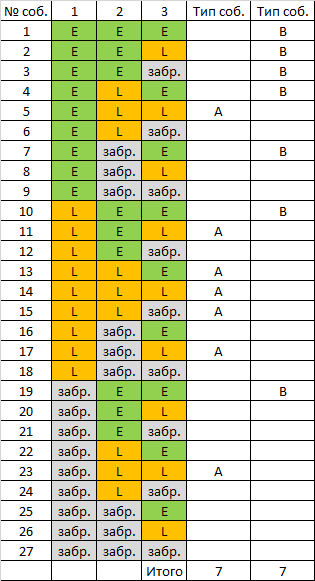

Всего 3 в степени 3 события, то есть 27

P(A) = 7/27 = 0.259259

P(B) = 7/27 = 0.259259


In [10]:
# выбор первого члена комиссии
A = ["E"] + ["L"]  + ["никто"]
# выбор второго члена комиссии
B = ["E"] + ["L"]  + ["никто"]
# выбор третьего члена комиссии
C = ["E"] + ["L"]  + ["никто"]
# задаем число экспериментов
n = 100000
# формируем датафрейм с нашими экспериментами, ге столбцы означают выбор каждого члена комиссии соответственно.
Z = pd.DataFrame({"A":list(map(lambda a: random.choice([
                           random.choice(A)
                           ]), range(n)
                              ))
                 , "B": list(map(lambda a: random.choice([
                           random.choice(B)
                           ]), range(n)
                              ))
                 ,  "C": list(map(lambda a: random.choice([
                           random.choice(C)
                           ]), range(n)
                              ))})

In [11]:
# 1. считаем статистику случаев, когда рекомендовали претендента L
p1 = len(Z[((Z.A == 'L') & (Z.B == 'L')) | ((Z.B == 'L') & (Z.C == 'L'))| ((Z.A == 'L') & (Z.C == 'L'))])/Z.shape[0]
print(f"{p1} - рекомендован L")
# 2. считаем статистику случаев, когда рекомендовали претендента E
p2 = len(Z[((Z.A == 'E') & (Z.B == 'E')) | ((Z.B == 'E') & (Z.C == 'E'))| ((Z.A == 'E') & (Z.C == 'E'))])/Z.shape[0]
print(f"{p2} - рекомендован E")

0.25866 - рекомендован L
0.25879 - рекомендован E


### Задача 4
Брошено две игральных кости. Описать множество элементарных событий. Найти вероятности событий:

A = {вышло две "шестерки"}

B = {сумма выпавших очков не меньше 11}

C = {не выпала ни одна "шестерка"}

---
Решение

Всего возможно 6 в степени 2 событий - итого 36 
Представим множество элементарных событий в виде таблицы:
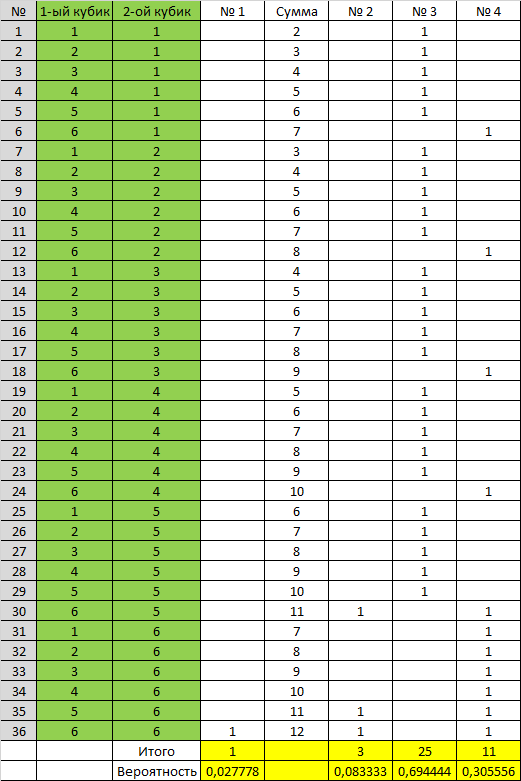

P(A) = 1/36 = 0.0277778

P(B) = 3/36 = 0.0833333

P(C) = 25/36 = 0.694444

In [12]:
# первый кубик
A = [i for i in range(1, 7)]
# второй кубик
B = [i for i in range(1, 7)]
# задаем число экспериментов
n = 100000
# формируем датафрейм с нашими экспериментами, где столбцы - результаты подбрасывания каждого кубика соответственно
Z = pd.DataFrame({"A":list(map(lambda a: random.choice([
                           random.choice(A)
                           ]), range(n)
                              ))
                 , "B": list(map(lambda a: random.choice([
                           random.choice(B)
                           ]), range(n)
                              ))
                 })

In [13]:
# 1. вышло две "шестерки"
p1 = len(Z[(Z.A == 6) & (Z.B == 6)])/Z.shape[0]
print(f"{p1} - вышло две 'шестерки'")
# 2. сумма выпавших очков не меньше 11
p2 = len(Z[(Z.A + Z.B >= 11)])/Z.shape[0]
print(f"{p2} - сумма выпавших очков не меньше 11")
# 3. не выпала ни одна "шестерка"
p3 = len(Z[((Z.A != 6)) & ((Z.B != 6))])/Z.shape[0]
print(f"{p3} - не выпала ни одна 'шестерка'")

0.02768 - вышло две 'шестерки'
0.08364 - сумма выпавших очков не меньше 11
0.69365 - не выпала ни одна 'шестерка'


## Вероятность суммы событий

### Задача 5
Брошены две игральные кости. Найти вероятность события D = {выпала хотя бы одна шестёрка}

---
Решение

P(D) = 1/6 + 1/6 - 1/36 = 6/36 + 6/36 - 1/36 = 11/36 = 0.305556


In [15]:
# выпала хотя бы одна шестёрка
p4 = len(Z[(Z.A == 6) | (Z.B == 6)])/Z.shape[0]
print(f"{p4} - выпала хотя бы одна 'шестерка'")

0.30635 - выпала хотя бы одна 'шестерка'


Предлагается также решить задачи: 

### Задача 6
В телефонном номере три последние цифры стерлись. Считая, что все возможные значения стершихся цифр равновероятны, найти вероятность событий:

A = {Стерлись различные цифры},

B = {Стерлись одинаковые цифры},

C = {Среди стершихся цифр хотя бы две совпадают},

D = {Среди стершихся цифр хотя бы две различны}


---

Решение

Всего возможных вариантов: 10 в степени 3, итого 1000 событий
1. Найдем количество номеров с разными числами. На первое место можно поставить любое число (всего у нас чисел 10), значит на второе место уже можно поставить всего 10−1=9 чисел, а на третьем месте уже остается 10−1−1=8 чисел. Значит, номеров с разными числами 10⋅9⋅8=720

P(A) = 720/1000 = 0.72
2. Всего возможно 10 комбинаций: 000, 111, 222, 333, 444, 555, 666, 777, 888, 999

P(B) = 10/1000 = 0.01

3. Среди стершихся цифр хотя бы две совпадают - среди стершихся нет цифр, чтобы были все различны 

P(C) = не P(A) = 1 - 0.72 = 0.28
4. Среди стершихся цифр хотя бы две различны - среди стершихся нет одинаковых цифр

P(D) = не P(B) = 1 - 0.01 = 0.99

In [16]:
# возможные значения первой цифры
A = [i for i in range(0, 10)]
# возможные значения второй цифры
B = [i for i in range(0, 10)]
# возможные значения третьей цифры
C = [i for i in range(0, 10)]
# задаем число экспериментов
n = 1000000
# формируем датафрейм с нашими экспериментами, где столбцы - возможные значения цифр в номере
Z = pd.DataFrame({"A":list(map(lambda a: random.choice([
                           random.choice(A)
                           ]), range(n)
                              ))
                 , "B": list(map(lambda a: random.choice([
                           random.choice(B)
                           ]), range(n)
                              ))
                 ,  "C": list(map(lambda a: random.choice([
                           random.choice(C)
                           ]), range(n)
                              ))})

In [17]:
# 1. Стерлись различные цифры
p1 = len(Z[((Z.A != Z.B)) & ((Z.A != Z.C)) & ((Z.B != Z.C))])/Z.shape[0]
print(f"{p1} - стерлись различные цифры")
# 2. Стерлись одинаковые цифры
p2 = len(Z[((Z.A == Z.B)) & ((Z.A == Z.C))])/Z.shape[0]
print(f"{p2} - стерлись одинаковые цифры")
# 3. Среди стершихся цифр хотя бы две совпадают
p3 = len(Z[((Z.A == Z.B)) | ((Z.A == Z.C)) | ((Z.B == Z.C))])/Z.shape[0]
print(f"{p3} - среди стершихся цифр хотя бы две совпадают")
# 4. Среди стершихся цифр хотя бы две различны
p4 = len(Z[((Z.A != Z.B)) | ((Z.A != Z.C)) | ((Z.B != Z.C))])/Z.shape[0]
print(f"{p4} - среди стершихся цифр хотя бы две различны")

0.719419 - стерлись различные цифры
0.009911 - стерлись одинаковые цифры
0.280581 - среди стершихся цифр хотя бы две совпадают
0.990089 - среди стершихся цифр хотя бы две различны


## Случайные величины

### Задача 7
В лотерее имеется 10 билетов, из которых один выигрышный. Размер выигрыша 10 ден. ед.; стоимость билета 1 ден ед. Найти закон распределения случайной величины X, равной чистому выигрышу участника лотереи, который вытаскивает билет первым.

---

Решение

Всего 10 билетов, один выигрышный. 

Вероятность выигрыша: 1/10 = 0.1, участник выиграет 9 ден. единиц.

Вероятность проигрыша: 9/10 = 0.9, участник проиграет 1 ден. единицу.

Это дискретная случайная величина.

Закон распределения можно представить в виде таблицы:

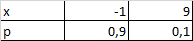

In [40]:
# формируем лотерейный билет и считаем, что выигрышный билет № 5
L = [i for i in range(0, 10)]
n = 10000
# формируем датафрейм с результатами нашей лотерии. 
Z = pd.DataFrame({"A":list(map(lambda a: random.choice([
                           random.choice(L)
                           ]), range(n)
                              ))})
result = len(Z[Z.A == 5]) * 10 - Z.shape[0]
print(f'Выигрыш {result} денежных единиц')

Выигрыш 290 денежных единиц


Предлагается также решить задачу: 

### Задача 8
Брошены две игральные кости. Найти закон распределения случайной величины $X$, равной сумме выпавших очков. Найти вероятности событий ${X <= 4}$, ${X > 4}$

---

Решение

Представим закон рапределения в виде таблицы:

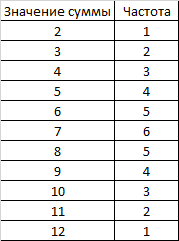

Видим, что закон распределения приближен к нормальному распределению.

P( X <= 4) = 6/36 = 0.16667

P( X > 4) = 30/36 = 0.83333

In [22]:
# зададим множество значений и соответсвующих вероятностей
# первый кубик
A = [i for i in range(1, 7)]
# второй кубик
B = [i for i in range(1, 7)]
# задаем число экспериментов
n = 100000
# формируем датафрейм с нашими экспериментами, где столбцы - результаты подбрасывания каждого кубика соответственно
Z = pd.DataFrame({"A":list(map(lambda a: random.choice([
                           random.choice(A)
                           ]), range(n)
                              ))
                 , "B": list(map(lambda a: random.choice([
                           random.choice(B)
                           ]), range(n)
                              ))
                 })

In [23]:
Z = Z.eval("summa = A + B")

<Axes: xlabel='summa'>

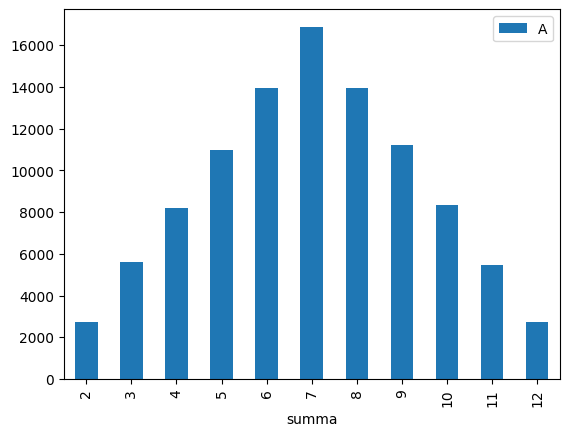

In [24]:
# Построим график распределения в виде гистограммы:
law = Z.groupby('summa').count()
law = law.drop('B', axis = 1)
law.plot(kind = 'bar')

In [25]:
# 1. Вероятность выпадения суммы очков X <= 4
p1 = len(Z[Z.summa <= 4])/Z.shape[0]
print(f'{p1} - вероятность выпадения суммы очков X <= 4')
# 2. Вероятность выпадения суммы очков X > 4
p2 = len(Z[Z.summa > 4])/Z.shape[0]
print(f'{p2} - вероятность выпадения суммы очков X > 4')

0.1653 - вероятность выпадения суммы очков X <= 4
0.8347 - вероятность выпадения суммы очков X > 4


## Условные вероятности

### Задача 9
Из колоды (36 карт) вынимают последовательно без возвращения две карты. Найти вероятность того, что первой картой была шестерка, а второй — семерка. Найти условную вероятность того же события при условии, что обе карты бубновой масти.


---

Решение:

P1 = 4/36 * 4/35 = 0.012698

P2 = 1/36 * 1/35 = 0.00079365

In [26]:
K = [i for i in range(1, 37)]
# sixs  - 1, 2, 3, 4
# sevens - 5, 6, 7, 8
# six_b - 2
# seven_b - 6

def one(w):
  K1 = [i for i in range(1, 37)]
  K1.remove(w)
  return random.choice(K1)

n = 1000000
# формируем датафрейм с нашими экспериментами, столбец A - результат извлчения шара из урны первый раз
Z = pd.DataFrame({"A":list(map(lambda a: random.choice([
                           random.choice(K)
                           ]), range(n)
                              ))
                 })

Z['B'] = Z['A'].map(one)
# 1. Найти вероятность того, что первой картой была шестерка, а второй — семерка
p1 = len(Z[((Z.A == 1) & (Z.B == 5)) | ((Z.A == 1) & (Z.B == 6)) | ((Z.A == 1) & (Z.B == 7)) | ((Z.A == 1) & (Z.B == 8)) | ((Z.A == 2) & (Z.B == 5)) | ((Z.A == 2) & (Z.B == 6)) | ((Z.A == 2) & (Z.B == 7)) | ((Z.A == 2) & (Z.B == 8)) |((Z.A == 3) & (Z.B == 5)) | ((Z.A == 3) & (Z.B == 6)) | ((Z.A == 3) & (Z.B == 7)) | ((Z.A == 3) & (Z.B == 8)) |((Z.A == 4) & (Z.B == 5)) | ((Z.A == 4) & (Z.B == 6)) | ((Z.A == 4) & (Z.B == 7)) | ((Z.A == 4) & (Z.B == 8))])/Z.shape[0]
print(f"{p1} - первой картой была шестерка, а второй — семерка")
# 2. Найти условную вероятность того же события при условии, что обе карты бубновой масти.
p2 = len(Z[(Z.A == 2) & (Z.B == 6)])/Z.shape[0]
print(f"{p2} - обе карты бубновой масти")


0.012732 - первой картой была шестерка, а второй — семерка
0.000805 - обе карты бубновой масти


Предлагается также решить задачу: 

### Задача 10
Из урны, содержащей два белых и три черных шара, последовательно извлекают два шара; вынутые шары не возвращаются. Если первый шар оказался черным, то перед вторым извлечением в урну добавляют белый шар. В противном случае состав оставшихся шаров не меняют. Найти вероятности событий:

$A$ = {извлечены два белых шара},

$B$ = {извлечены два черных шара}

Указание. Пусть событие $C_1$ = {первый шар белый}, событие $C_2$ = {второй шар белый}. Тогда $A = C_1C_2$, $B = \overline C_1 \overline C_2$ 

---

Решение:

P(A) = 2/5 * 1/4 = 0.1

P(B) = 3/5 * 2/5 = 0.24

In [29]:
# заполняем урну перед первым извлечением шара
B1 = ["white"]*2 + ['black']*3
# заполняем урну перед вторым извлечением шара, если в первый раз извлекли черный шар
B21 = ["white"]*3 + ['black']*2
# заполняем урну перед вторым извлечением шара, если в первый раз извлекли белый шар
B22 = ["white"] + ['black']*3
# задаем число экспериментов
n = 100000
# формируем датафрейм с нашими экспериментами, столбец A - результат извлечения шара из урны первый раз
Z = pd.DataFrame({"A":list(map(lambda a: random.choice([
                           random.choice(B1)
                           ]), range(n)
                              ))
                 })

# напишем функцию, извлекающую второй раз шар в зависимости от результат извлечения шара в первый раз
def one(w):
  if w =='white':
    return random.choice(B22)
  elif w == 'black':
    return random.choice(B21)

# добавляем в наш датафрейм второй столбец, который представляет из себя результат извлечения второго шара в зависимости от первого
Z['B'] = Z['A'].map(one)



In [30]:
# 1. Извлечены два белых шара
p1 = len(Z[(Z.A == 'white') & (Z.B == 'white')])/Z.shape[0]
print(f"{p1} - извлечены два белых шара")
# 2. Извлечены два черных шара
p2 = len(Z[(Z.A == 'black') & (Z.B == 'black')])/Z.shape[0]
print(f"{p2} - извлечены два черных шара")


0.0999 - извлечены два белых шара
0.24116 - извлечены два черных шара
